# Second model

In [1]:
#Imports
import numpy as np # linear algebra
print('numpy: {}'.format(np.__version__))
import matplotlib.pyplot as plt
import os
from os.path import join
from sklearn.model_selection import train_test_split

from skimage.io import imread
from skimage.transform import resize
import pydicom as dicom

import tensorflow as tf
print('tensorflow: {}'.format(tf.__version__))

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


from tensorflow.keras.callbacks import TensorBoard

import pickle

numpy: 1.21.2
tensorflow: 2.6.0


In [9]:
#Data prep, loading the dataset 

import datetime

NAME = "second_mdl_test" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print(NAME)

tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

pickle_in = open("train_x.pickle","rb")
train_x = pickle.load(pickle_in)

pickle_in = open("train_y.pickle","rb")
train_y = pickle.load(pickle_in)

train_x = train_x/255.0-0.5
print(len(train_x))

train_y_1D = train_y
train_y = np.asarray(train_y).astype('float32').reshape((-1,1))

train_y = tf.keras.utils.to_categorical(train_y)
print(len(train_y))

print(train_y)
print(train_y_1D)

second_mdl_test20220330-153934
584
584
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
['1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', 

In [10]:
train_xx, test_x, train_yy_1D, test_y_1D = train_test_split(train_x, train_y_1D, test_size=0.1)

#keeping 1D array of test label to use it for the confusion matrix 
train_yy = np.asarray(train_yy_1D).astype('float32').reshape((-1,1))
train_yy = tf.keras.utils.to_categorical(train_yy)
test_y = np.asarray(test_y_1D).astype('float32').reshape((-1,1))
test_y = tf.keras.utils.to_categorical(test_y)
print(test_y_1D)
print(test_y)

train_X, val_X, train_Y, val_Y = train_test_split(train_xx, train_yy, test_size=0.15) #split un test dataset de ici aussi, par defaut c'est shuffled 

['0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0']
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [11]:
from keras import backend as K
optimizer = tf.keras.optimizers.Adam(0.001)
optimizer.learning_rate.assign(0.001)
print(optimizer.learning_rate)

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [12]:
#Model

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=train_x.shape[1:]))  #64param
model.add(Conv2D(32, (3, 3))) 
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Conv2D(16, (3, 3)))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(8, (3, 3)))
model.add(Conv2D(8, (3, 3)))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(32)) #Fully connected layer, needs 1D ds
model.add(Activation('relu'))

model.add(Dense(2)) #mieux de faire sortir 2 classes 
model.add(Activation('softmax')) #activation=fct non lineaire, pb sigmoid=grad tres faible pr petites val -> mieux d'utiliser relu (grad 0 ou 1, pas de vanishing grad)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['categorical_accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 124, 124, 32)      9248      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 122, 122, 32)      9248      
_________________________________________________________________
activation_10 (Activation)   (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 59, 59, 16)        4624      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 57, 57, 16)       

In [13]:
model.fit(train_X ,train_Y, batch_size=6, epochs=30, validation_data = (val_X, val_Y) ,callbacks=[tensorboard])

Epoch 1/30
75/75 [==============================] - 12s 141ms/step - loss: 0.7012 - categorical_accuracy: 0.5224 - val_loss: 0.7087 - val_categorical_accuracy: 0.4937
Epoch 2/30
75/75 [==============================] - 9s 118ms/step - loss: 0.6948 - categorical_accuracy: 0.5426 - val_loss: 0.6757 - val_categorical_accuracy: 0.6329
Epoch 3/30
75/75 [==============================] - 8s 107ms/step - loss: 0.6864 - categorical_accuracy: 0.5695 - val_loss: 0.7124 - val_categorical_accuracy: 0.4304
Epoch 4/30
75/75 [==============================] - 9s 121ms/step - loss: 0.6753 - categorical_accuracy: 0.5874 - val_loss: 0.6538 - val_categorical_accuracy: 0.6582
Epoch 5/30
75/75 [==============================] - 8s 112ms/step - loss: 0.6609 - categorical_accuracy: 0.5807 - val_loss: 0.6964 - val_categorical_accuracy: 0.5063
Epoch 6/30
75/75 [==============================] - 9s 122ms/step - loss: 0.6320 - categorical_accuracy: 0.6413 - val_loss: 0.6748 - val_categorical_accuracy: 0.6076
Epo

In [8]:
import visualkeras
#source : https://github.com/paulgavrikov/visualkeras

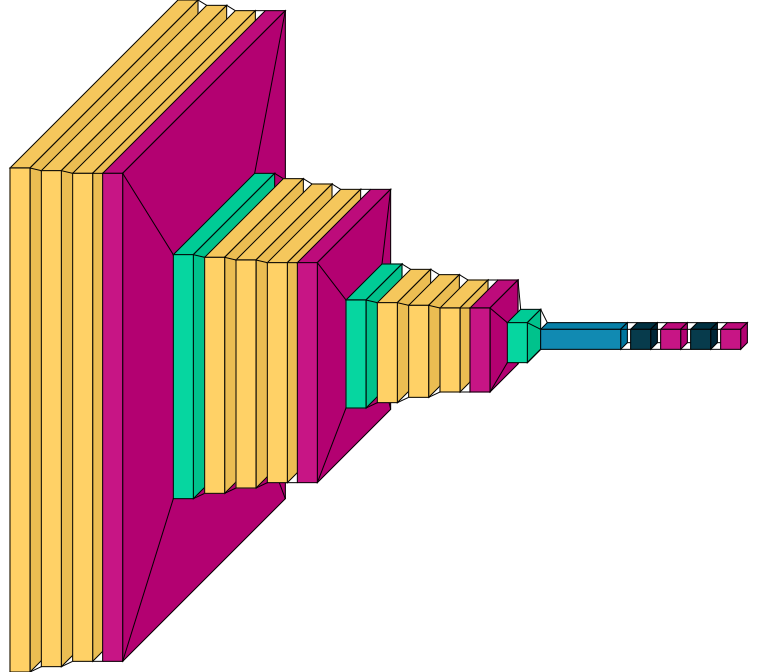

In [9]:
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict
import visualkeras
color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'lightpink'
color_map[Activation]['fill'] = 'mediumvioletred'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'mediumorchid'
color_map[Dense]['fill'] = 'palevioletred'
color_map[Flatten]['fill'] = 'plum'

visualkeras.layered_view(model, color_map=color_map)

In [18]:
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score,classification_report
import itertools
from skimage.io import imread,imsave,imshow

In [19]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap='RdPu'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    save = imsave('results/confusionmatrix.png',cm)
#https://sites.google.com/view/amarnath-r/keras-deep-learning-image-classification-a-simple-example


In [16]:
model.evaluate(test_x,test_y, batch_size=6)

10/10 [==============================] - 0s 23ms/step - loss: 8.7609 - categorical_accuracy: 0.5254


[8.760897636413574, 0.5254237055778503]

In [20]:
#use the test dataset
Y_pred = model.predict(test_x)
y_pred = np.argmax(Y_pred, axis=1)

print(y_pred.shape)

print('Classification Report')
target_names = ['0', '1']
print(classification_report(test_y_1D, y_pred.astype(str), target_names=target_names))
#https://gist.github.com/RyanAkilos/3808c17f79e77c4117de35aa68447045

(59,)
Classification Report
              precision    recall  f1-score   support

           0       0.52      0.41      0.46        29
           1       0.53      0.63      0.58        30

    accuracy                           0.53        59
   macro avg       0.52      0.52      0.52        59
weighted avg       0.52      0.53      0.52        59



Normalized confusion matrix


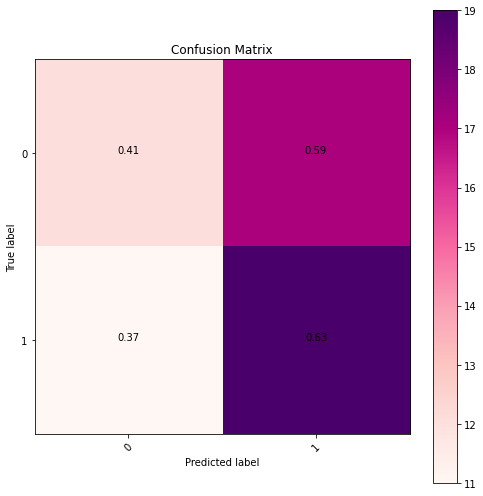

In [21]:
#Confusion Matrix 
cm = confusion_matrix(test_y_1D,y_pred.astype(str))
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')